# 1. Loading and filtering data

In [1]:
import pandas as pd

## 1.1. Firstly we load the data and filter the columns

In [10]:
df = pd.read_csv("/home/juls/Escritorio/Moriarty2.csv",
                  usecols=["UUID","ActionType"])

df2 = pd.read_csv("/home/juls/Escritorio/T4.csv",
                 usecols=["UUID", "CPU_0", "CPU_1", "CPU_2", "CPU_3", "Traffic_TotalRxBytes", 
                          "Traffic_TotalTxBytes", "MemFree"])

## 1.2. Merging two datasheets

The first thing we need to do it is to convert column 'UUID' (which is a timestamp in milliseconds) into a date timestamp

In [18]:
df['UUID'] = pd.to_datetime(df['UUID'], unit="ms")
df['UUID'] = df['UUID'].dt.round('t')


df2['UUID'] = pd.to_datetime(df['UUID'], unit="ms")
df2['UUID'] = df['UUID'].dt.round('t')

data = pd.merge(df,df2, on=['UUID'])

## 1.3. Replace ActionType

We need numeric values in the columns, so we replace ActionType malicious/benign by 1/0 respectively. And finally que don't need column 'UUID' for the predincting model so we remove it. 

In [19]:
data['ActionType'] = data['ActionType'].replace(['malicious'], 1)
data['ActionType'] = data['ActionType'].replace(['benign'], 0)
data = data.drop('UUID', 1)


# 2. CROSS VALIDATION ANALYSIS

## 2.1. Features and labels

In [26]:
X = data[['CPU_0', 'CPU_1', 'CPU_2', 'CPU_3', 'Traffic_TotalRxBytes', 'Traffic_TotalTxBytes', 'MemFree']]
y = data['ActionType']

## 2.3. x axis for plotting

In [27]:
import numpy as np
xx = np.stack(i for i in range(len(y)))

##  2.4. Analysis

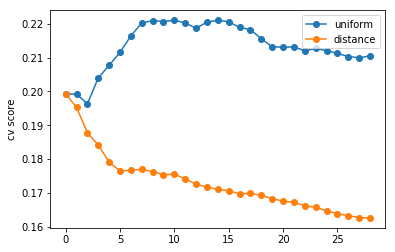

In [30]:
from sklearn import neighbors
from sklearn.cross_validation import cross_val_score

for i, weights in enumerate(['uniform', 'distance']):
    total_scores = []
    for n_neighbors in range(1,30):
        knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
        knn.fit(X,y)
        scores = -cross_val_score(knn, X,y, 
                                    scoring='neg_mean_absolute_error', cv=10)
        total_scores.append(scores.mean())
    
    plt.plot(range(0,len(total_scores)), total_scores, 
             marker='o', label=weights)
    plt.ylabel('cv score')

plt.legend()
plt.show()  

# PCA.

In [3]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
datanorm = scaler.fit_transform(data)

In [4]:
from sklearn.decomposition import PCA

n_components = 2
estimator = PCA(n_components)
X_pca = estimator.fit_transform(datanorm)

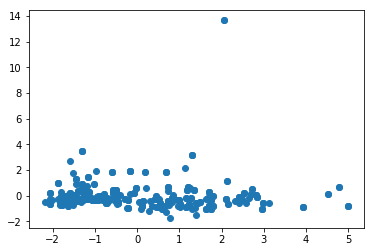

In [5]:
import numpy
import matplotlib.pyplot as plt

x = X_pca[:,0]
y = X_pca[:,1]
plt.scatter(x,y)
plt.show()

# Creating CSV to analyze the results.

In [6]:
import os

directory = "../data/processed"

if not os.path.exists(directory):
    os.makedirs(directory)
    
data.to_csv(directory + "/MoriartyT4.csv")